<a href="https://colab.research.google.com/github/89DAN89/89DAN89.github.io/blob/master/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import tree
import pandas as pd
import os

In [2]:
from google.colab import files
data_to_load = files.upload()

Saving dep2.csv to dep2.csv


In [3]:
import io
dep = pd.read_csv(io.BytesIO(data_to_load['dep2.csv']))
X = dep.drop("depressed", axis=1)
y = dep["depressed"]
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42)
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)



In [4]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train_categorical)
rf.score(X_test_scaled, y_test_categorical)


0.8083623693379791

In [5]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_scaled, y_train_categorical)
clf.score(X_test_scaled, y_test_categorical)

0.7038327526132404

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
#rf = RandomForestClassifier(n_estimators=200)
#rf = rf.fit(X_train, y_train)
#rf.score(X_test, y_test)

0.8013937282229965

In [ ]:
#clf = tree.DecisionTreeClassifier()
#clf = clf.fit(X_train, y_train)
#clf.score(X_test, y_test)

0.7177700348432056

In [51]:
p = rf.predict(X_test_scaled)
predictions =[item[1] for item in p]

In [52]:
predictionvsactual = pd.DataFrame({"Prediction rf": predictions, "Actual": y_test})

In [53]:
predictionvsactual.head(59)

Prediction rf  Actual
290             0.0     0.0
1112            0.0     0.0
852             0.0     0.0
413             0.0     0.0
1138            0.0     0.0
107             0.0     0.0
830             0.0     0.0
1125            0.0     0.0
844             0.0     0.0
590             0.0     0.0
942             0.0     0.0
113             0.0     0.0
872             0.0     0.0
409             0.0     1.0
670             0.0     0.0
49              0.0     0.0
156             1.0     0.0
785             0.0     0.0
51              0.0     1.0
1054            0.0     0.0
109             0.0     0.0
892             0.0     0.0
296             0.0     0.0
928             0.0     0.0
362             0.0     0.0
561             0.0     0.0
519             0.0     0.0
693             0.0     0.0
273             0.0     0.0
1133            0.0     0.0
361             0.0     0.0
535             0.0     0.0
323             0.0     0.0
436             0.0     0.0
1013            0.0     0.0
837             0.0     0.0
170             0.0     0.0
481             0.0     0.0
567             0.0     0.0
893             0.0     1.0
674             0.0     1.0
813             0.0     0.0
86              0.0     0.0
690             0.0     0.0
570             0.0     1.0
140             0.0     0.0
23              0.0     0.0
44              0.0     0.0
449             0.0     0.0
464             0.0     1.0
192             0.0     0.0
650             0.0     0.0
976             0.0     0.0
382             0.0     0.0
534             0.0     0.0
739             0.0     0.0
996             0.0     1.0
319             0.0     0.0
884             0.0     1.0

In [54]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
  
actual = y_test
predicted = predictions
results = confusion_matrix(predicted, actual)

In [55]:
results

array([[231,  53],
       [  2,   1]])

In [56]:
sensitivity1 = results[1,1]/(results[0,1]+results[1,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = results[0,0]/(results[0,0]+results[1,0])
print('Specificity : ', specificity1)

Sensitivity :  0.018518518518518517
Specificity :  0.9914163090128756


In [44]:
p = clf.predict(X_test_scaled)
predictions =[item[1] for item in p]

In [45]:
predictionvsactual = pd.DataFrame({"Prediction clf": predictions, "Actual": y_test})

In [46]:
predictionvsactual.head(59)

Prediction clf  Actual
290              0.0     0.0
1112             0.0     0.0
852              1.0     0.0
413              0.0     0.0
1138             0.0     0.0
107              0.0     0.0
830              0.0     0.0
1125             0.0     0.0
844              0.0     0.0
590              0.0     0.0
942              0.0     0.0
113              0.0     0.0
872              0.0     0.0
409              0.0     1.0
670              0.0     0.0
49               1.0     0.0
156              1.0     0.0
785              0.0     0.0
51               0.0     1.0
1054             1.0     0.0
109              0.0     0.0
892              0.0     0.0
296              0.0     0.0
928              1.0     0.0
362              0.0     0.0
561              0.0     0.0
519              0.0     0.0
693              0.0     0.0
273              0.0     0.0
1133             0.0     0.0
361              0.0     0.0
535              0.0     0.0
323              0.0     0.0
436              0.0     0.0
1013             0.0     0.0
837              1.0     0.0
170              0.0     0.0
481              0.0     0.0
567              0.0     0.0
893              0.0     1.0
674              0.0     1.0
813              0.0     0.0
86               0.0     0.0
690              0.0     0.0
570              0.0     1.0
140              0.0     0.0
23               0.0     0.0
44               0.0     0.0
449              1.0     0.0
464              0.0     1.0
192              0.0     0.0
650              0.0     0.0
976              0.0     0.0
382              1.0     0.0
534              0.0     0.0
739              0.0     0.0
996              0.0     1.0
319              0.0     0.0
884              0.0     1.0

In [47]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
  
actual = y_test
predicted = predictions
results = confusion_matrix(predicted,actual)

In [48]:
results

array([[193,  41],
       [ 40,  13]])

In [50]:
sensitivity1 = results[1,1]/(results[0,1]+results[1,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = results[0,0]/(results[0,0]+results[1,0])
print('Specificity : ', specificity1)

Sensitivity :  0.24074074074074073
Specificity :  0.8283261802575107


In [60]:
import matplotlib.pyplot as plt


In [63]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_5 <= 0.25
|   |--- feature_1 <= 0.81
|   |   |--- feature_12 <= 0.16
|   |   |   |--- feature_23 <= 0.10
|   |   |   |   |--- feature_28 <= 0.20
|   |   |   |   |   |--- feature_1 <= 0.75
|   |   |   |   |   |   |--- feature_25 <= 0.27
|   |   |   |   |   |   |   |--- feature_28 <= 0.05
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_28 >  0.05
|   |   |   |   |   |   |   |   |--- feature_1 <= 0.45
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 0.25
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_1 >  0.25
|   |   |   |   |   |   |   |   |   |   |--- feature_5 <= 0.19
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_5 >  0.19
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |--- feature_1 >  0.45
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   

[Text(165.0897638308977, 213.69103448275862, 'X[5] <= 0.25\ngini = 0.273\nsamples = 860\nvalue = [[140, 720]\n[720, 140]]'),
 Text(82.5286012526096, 206.19310344827585, 'X[1] <= 0.811\ngini = 0.437\nsamples = 96\nvalue = [[31, 65]\n[65, 31]]'),
 Text(68.96367432150313, 198.6951724137931, 'X[12] <= 0.159\ngini = 0.405\nsamples = 85\nvalue = [[24, 61]\n[61, 24]]'),
 Text(51.77453027139875, 191.19724137931036, 'X[23] <= 0.1\ngini = 0.365\nsamples = 75\nvalue = [[18, 57]\n[57, 18]]'),
 Text(33.96409185803758, 183.69931034482758, 'X[28] <= 0.204\ngini = 0.293\nsamples = 56\nvalue = [[10, 46]\n[46, 10]]'),
 Text(21.53820459290188, 176.20137931034483, 'X[1] <= 0.75\ngini = 0.219\nsamples = 48\nvalue = [[6, 42]\n[42, 6]]'),
 Text(13.25427974947808, 168.70344827586206, 'X[25] <= 0.273\ngini = 0.165\nsamples = 44\nvalue = [[4, 40]\n[40, 4]]'),
 Text(6.62713987473904, 161.2055172413793, 'X[28] <= 0.053\ngini = 0.133\nsamples = 42\nvalue = [[3, 39]\n[39, 3]]'),
 Text(3.31356993736952, 153.70758620

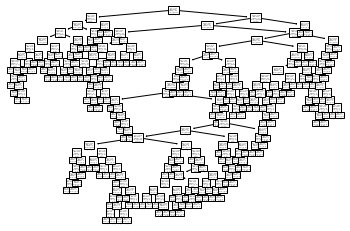

In [70]:
tree.plot_tree(clf)

In [72]:
fn=['Sex','Age', 'Marital Status','Married', 'Number of Children', 'Size of household', 'Years of education', 'Number of Children under 18', 'Non-durable expenditure (USD)','Value of durable goods (USD)' ,'Value of cell phone (USD)', 'Value of savings (USD)', 'Land owned (acres)', 'Expenditure: Food total (USD)', 'Expenditure: Alcohol (USD)','Expenditure: Tobacco (USD)', 'Medical expenditure past month (USD)','Medical expenditure, children (USD)', 'Education expenditure (USD)', 'Social expenditure (USD)', 'Other expenditure (USD)', 'Business revenue, monthly (USD)', 'Business flow expenses, monthly (USD)', 'Total expenses, monthly (USD)', 'Whole days without food (adults, \# last month)','Whole days without food (children, \# last month)', 'Number of times ate meat or fish (last week)','Enough food in the house for tomorrow?', 'Respondent slept hungry (last week)', 'Average number of sick days per House Hold member', 'Proportion of children under 5 who died (1 year)', 'Education expenditure past month (USD)', 'Proportion of school-aged children in school', 'Durable Investments', 'Non-Durable Investments']
cn=['Depressed', 'Not Depressed']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=3000)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')